In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rc('font', family = 'Malgun Gothic')
matplotlib.rc('axes', unicode_minus = False)
%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

#sns.set(font='NanumBarunGothic', font_scale=2.5)
sns.set(font='Malgun Gothic', font_scale=2.5)
plt.rcParams['axes.unicode_minus'] = False
import pandas as pd
import matplotlib.pyplot as plt

In [88]:
df = pd.read_csv('C:\\Users\\campus4D028\\Desktop\\새 폴더 (5)\\data\\project3_완성본.csv')

In [48]:
len(df)

663110

In [89]:
# 첫 번째 중복된 행을 유지하고 나머지 삭제
df = df.drop_duplicates(keep='first')
len(df)

661920

## 재구매율 분석
- 회원별 - VIP 재구매율 / 일반 재구매율 비교 등
- 물품별 - 재구매 잦은 물품물품

In [66]:
df.head()

,회원번호,회원상태,구매수량,구매금액,주문일시,배송시작일,배송완료일,사용 적립금,주문취소여부,주문시간,...,물품중분류,식품/비식품,냉장여부,개당 구매금액,물품금액,가격대,고객분류,연령대,이탈위험고객,R
0,1032097472,정상회원,1.0,7083,2022-01-08,-,-,0,주문취소,오후 01:00,...,논지엠오유정란,식품,비냉장,7083.0,9923,저가,일반,30대,0.0,8.0
1,1032097472,정상회원,1.0,10338,2022-09-16,2022-09-17 00:00:00,2022-09-18 00:00:00,0,주문완료,오후 10:01,...,논지엠오유정란,식품,비냉장,10338.0,9923,저가,일반,30대,0.0,8.0
2,1032097472,정상회원,1.0,10338,2022-06-18,2022-06-18 00:00:00,2022-06-18 00:00:00,0,주문완료,오후 08:00,...,논지엠오유정란,식품,비냉장,10338.0,9923,저가,일반,30대,0.0,8.0
3,1032097472,정상회원,1.0,10338,2022-04-02,2022-04-02 00:00:00,2022-04-02 00:00:00,0,주문완료,오후 07:40,...,논지엠오유정란,식품,비냉장,10338.0,9923,저가,일반,30대,0.0,8.0
4,1032097472,정상회원,1.0,8615,2022-05-07,2022-05-07 00:00:00,2022-05-08 00:00:00,0,주문완료,오후 03:29,...,논지엠오유정란,식품,비냉장,8615.0,9923,저가,일반,30대,0.0,8.0


# 재구매
## 회원별 주문 기록을 날짜 순으로 정렬
## 회원별 중복된 주문일시는 하나만 남기고 삭제
## 주문 완료된 기록이 2개 이상인 경우
- vip 고객은 한번 구매 후 최소 한번 더 구매했음 -> 100%
- 일반 고객들 중 74%가 한번 더 구매함

In [62]:
# 1. 주문완료만 필터링
df_filtered = df[df['주문취소여부'] == '주문완료']

# 2. 중복된 주문일시 제거
df_filtered = df_filtered.drop_duplicates(subset=['회원번호', '주문일시'])

# 3. 재구매율 계산을 위해 회원별 주문 수 계산
order_counts = df_filtered.groupby(['회원번호', '고객분류']).size().reset_index(name='주문수')

# 4. 재구매율: 주문 수가 1보다 큰 경우를 재구매로 간주
order_counts['재구매율'] = order_counts['주문수'].apply(lambda x: 1 if x > 1 else 0)

# 5. 고객분류별 재구매율 비교
rebuy_rate = order_counts.groupby('고객분류')['재구매율'].mean().reset_index()

print(rebuy_rate)

  고객분류      재구매율
0  VIP  1.000000
1   일반  0.741749


## 재구매율 = 해당년도 재구매한 고객수 / 해당년도 전체 구매 고객 수 * 100
- 위에 구한 재구매율이랑 이거랑 값이 같게 나옴

In [9]:
df.head()

,회원번호,회원상태,구매수량,구매금액,주문일시,배송시작일,배송완료일,사용 적립금,주문취소여부,주문시간,...,물품중분류,식품/비식품,냉장여부,개당 구매금액,물품금액,가격대,고객분류,연령대,이탈위험고객,R
0,1032097472,정상회원,1.0,7083,2022-01-08,-,-,0,주문취소,오후 01:00,...,논지엠오유정란,식품,비냉장,7083.0,9923,저가,일반,30대,0.0,8.0
1,1032097472,정상회원,1.0,10338,2022-09-16,2022-09-17 00:00:00,2022-09-18 00:00:00,0,주문완료,오후 10:01,...,논지엠오유정란,식품,비냉장,10338.0,9923,저가,일반,30대,0.0,8.0
2,1032097472,정상회원,1.0,10338,2022-06-18,2022-06-18 00:00:00,2022-06-18 00:00:00,0,주문완료,오후 08:00,...,논지엠오유정란,식품,비냉장,10338.0,9923,저가,일반,30대,0.0,8.0
3,1032097472,정상회원,1.0,10338,2022-04-02,2022-04-02 00:00:00,2022-04-02 00:00:00,0,주문완료,오후 07:40,...,논지엠오유정란,식품,비냉장,10338.0,9923,저가,일반,30대,0.0,8.0
4,1032097472,정상회원,1.0,8615,2022-05-07,2022-05-07 00:00:00,2022-05-08 00:00:00,0,주문완료,오후 03:29,...,논지엠오유정란,식품,비냉장,8615.0,9923,저가,일반,30대,0.0,8.0


In [63]:
# 1. 주문완료만 필터링
df_filtered = df[df['주문취소여부'] == '주문완료']

# 2. 중복된 주문일시 제거
df_filtered = df_filtered.drop_duplicates(subset=['회원번호', '주문일시'])

# 3. 고객분류별 회원의 주문 횟수 계산
order_counts = df_filtered.groupby(['고객분류', '회원번호']).size().reset_index(name='주문수')

# 4. 고객분류별 재구매 고객 수와 전체 구매 고객 수 계산
rebuy_counts = order_counts.groupby('고객분류').apply(lambda x: (x['주문수'] > 1).sum()).reset_index(name='재구매고객수')
total_counts = order_counts.groupby('고객분류')['회원번호'].nunique().reset_index(name='전체고객수')

# 5. 재구매율 계산
rebuy_rate = pd.merge(rebuy_counts, total_counts, on='고객분류')
rebuy_rate['재구매율'] = (rebuy_rate['재구매고객수'] / rebuy_rate['전체고객수']) * 100

print(rebuy_rate)

  고객분류  재구매고객수  전체고객수        재구매율
0  VIP    1377   1377  100.000000
1   일반    8226  11090   74.174932


## 물품별로 재구매가 잦은 물품
- 주문취소여부가 '주문완료'인 데이터만 필터링
- 회원번호, 주문일시, 물품명이 동일한 중복된 주문을 제거
- 한명이 해당 제품을 또 구매하는 경우는 제외함(A제품을 샀던 사람이 다음날 A제품을 사면 재구매율 100%)
- 최소 백명이 재구매한 물품만 출력 (적은인원의 재구매율을 높여봤자 매출에 영향이 가지 않을 것 같아서)
- 신선과 비신선으로 나누어서 promotion이 필요함

In [64]:
# 1. 주문완료만 필터링
df_filtered = df[df['주문취소여부'] == '주문완료']

# 2. 중복된 주문일시 제거
df_filtered = df_filtered.drop_duplicates(subset=['회원번호', '주문일시', '물품명'])

# 3. 물품별 고객 수가 하나인 물품 제거
customer_counts = df_filtered.groupby('물품명')['회원번호'].nunique().reset_index(name='고객수')
valid_items = customer_counts[customer_counts['고객수'] > 1]['물품명']
df_filtered = df_filtered[df_filtered['물품명'].isin(valid_items)]

# 4. 물품별 회원의 주문 횟수 계산
order_counts = df_filtered.groupby(['물품명', '회원번호']).size().reset_index(name='주문수')

# 5. 물품별 재구매 고객 수와 전체 구매 고객 수 계산
rebuy_counts = order_counts.groupby('물품명').apply(lambda x: (x['주문수'] > 1).sum()).reset_index(name='재구매고객수')
total_counts = order_counts.groupby('물품명')['회원번호'].nunique().reset_index(name='전체고객수')

# 6. 재구매율 계산
rebuy_rate = pd.merge(rebuy_counts, total_counts, on='물품명')
rebuy_rate['재구매율'] = (rebuy_rate['재구매고객수'] / rebuy_rate['전체고객수']) * 100

# 7. 재구매 고객수가 최소 100명 이상인 제품만 필터링
rebuy_rate_filtered = rebuy_rate[rebuy_rate['재구매고객수'] >= 100]

# 8. 재구매율이 높은 순으로 정렬
rebuy_rate_sorted = rebuy_rate_filtered.sort_values(by='재구매율', ascending=False)

rebuy_rate_sorted.head(10)

,물품명,재구매고객수,전체고객수,재구매율
1255,유정란/친환경,3573,5276,67.721759
384,두부,3670,5546,66.173819
1526,콩나물,2508,4340,57.788018
1067,양파,1884,3413,55.200703
1415,찌개용두부,1771,3247,54.542655
1136,오이,1461,2794,52.290623
327,당근,1567,3098,50.581020
642,백미/유,948,1875,50.560000
359,동물복지유정란,1569,3218,48.756992
1392,중파,1171,2422,48.348472


## 선순환?이 되게끔, 재구매율이 높은 제품살 때 다른 재구매율이 높은 제품을 옆에 띄운다? 개인화마케팅?
## 재구매율이 워낙 낮은(20%미만)인 제품들에 한해서(진간장, 미역) 구매 시 할인쿠폰제공?
- 일반적으로 구매주기가 긴 제품 제외
- 진간장, 미역, 올리고당, 삼계탕 재료, 솔부추, 부침가루, 맛간장
- 구매주기가 비교적 짧은 제품을 대상으로 재구매율을 높일 방안이 필요해보임
- 쌈다시마, 꼬마새송이버섯, 등심, 새우살, 숙주나물, 고기만두, 우유식빵, 국물멸치, 오이맛풋고추, 단팥빵 

In [65]:
rebuy_rate_filtered.sort_values(by='재구매율', ascending=True).head(20)

,물품명,재구매고객수,전체고객수,재구매율
1404,진간장,109,582,18.728522
592,미역,160,807,19.826518
1243,유기쌀올리고당,102,510,20.000000
757,삼계탕 재료모음,102,500,20.400000
1459,찹쌀유과,100,474,21.097046
879,솔부추,107,499,21.442886
986,쌈다시마,121,550,22.000000
193,꼬마새송이버섯,117,523,22.370937
679,부침가루,246,1097,22.424795
406,등심,103,457,22.538293


## 일반과 vip나누지않고, 그냥 전체 재구매율

In [117]:
# 1. 주문완료만 필터링
df_filtered = df[df['주문취소여부'] == '주문완료']

# 2. 중복된 주문일시 제거
df_filtered = df_filtered.drop_duplicates(subset=['회원번호', '주문일시'])

# 3. 물품별 고객 수가 하나인 물품 제거
customer_counts = df_filtered.groupby('물품명')['회원번호'].nunique().reset_index(name='고객수')
valid_items = customer_counts[customer_counts['고객수'] > 1]['물품명']
df_filtered = df_filtered[df_filtered['물품명'].isin(valid_items)]

# 4. 물품별 회원의 주문 횟수 계산
order_counts = df_filtered.groupby(['물품명', '회원번호']).size().reset_index(name='주문수')

# 5. 물품별 재구매 고객 수와 전체 구매 고객 수 계산
rebuy_counts = order_counts.groupby('물품명').apply(lambda x: (x['주문수'] > 1).sum()).reset_index(name='재구매고객수')
total_counts = order_counts.groupby('물품명')['회원번호'].nunique().reset_index(name='전체고객수')

# 6. 재구매율 계산
rebuy_rate = pd.merge(rebuy_counts, total_counts, on='물품명')
rebuy_rate['재구매율'] = (rebuy_rate['재구매고객수'] / rebuy_rate['전체고객수']) * 100

# 7. 재구매 고객수가 최소 100명 이상인 제품만 필터링
rebuy_rate_filtered = rebuy_rate[rebuy_rate['재구매고객수'] >= 100]

# 8. 재구매율이 높은 순으로 정렬
rebuy_rate_sorted = rebuy_rate_filtered.sort_values(by='재구매율', ascending=False)

rebuy_rate_sorted.head(10)

,물품명,재구매고객수,전체고객수,재구매율
989,유정란/친환경,3573,5276,67.721759
295,두부,3345,5197,64.364056
853,양파,1390,2834,49.047283
1225,콩나물,1487,3226,46.094234
899,오이,972,2160,45.000000
276,동물복지유정란,1153,2688,42.894345
1209,칠분도미/유,177,474,37.341772
1126,찌개용두부,518,1467,35.310157
972,유기농우유,225,638,35.266458
898,오분도미/유,141,411,34.306569


## 물품중분류 = '두부' + '주문완료'인 고객들 중에서, 월별로 가장 안팔리는 일자들을 모았음
- 빈도수가 0인 날짜는 제외 -> 쉬는날이지않을까?
- 그냥 2022년 전체 일자 중에 두부가 팔린날 빈도수 찍어서 가장 안팔린날 선정하는 것 보다
- 월별로 두부 팔린날 빈도수를 찍어서 가장 적게 팔린 3개의 일자를 선택해서 월별 경향성을 보려고 했음

In [72]:
# 물품중분류가 '두부'인 데이터 필터링
df_filtered = df[df['물품중분류'] == '두부']

# 주문일시를 날짜형으로 변환
df_filtered['주문일시'] = pd.to_datetime(df_filtered['주문일시'])

# 월별로 그룹화하고 일자의 빈도수 계산
df_filtered['월'] = df_filtered['주문일시'].dt.to_period('M')
daily_counts = df_filtered.groupby(['월', df_filtered['주문일시'].dt.day]).size()

# 일자별 빈도수 계산
daily_counts = daily_counts.reset_index(name='빈도수')

# 각 월별로 일자별 빈도수 정렬 후 가장 적은 빈도수 3개 찾기
result = daily_counts.groupby('월').apply(lambda x: x.nsmallest(3, '빈도수')).reset_index(drop=True)


In [73]:
result

,월,주문일시,빈도수
0,2022-01,20,83
1,2022-01,27,85
2,2022-01,13,87
3,2022-02,10,76
4,2022-02,21,86
5,2022-02,17,97
6,2022-03,31,60
7,2022-03,24,69
8,2022-03,10,72
9,2022-04,28,80


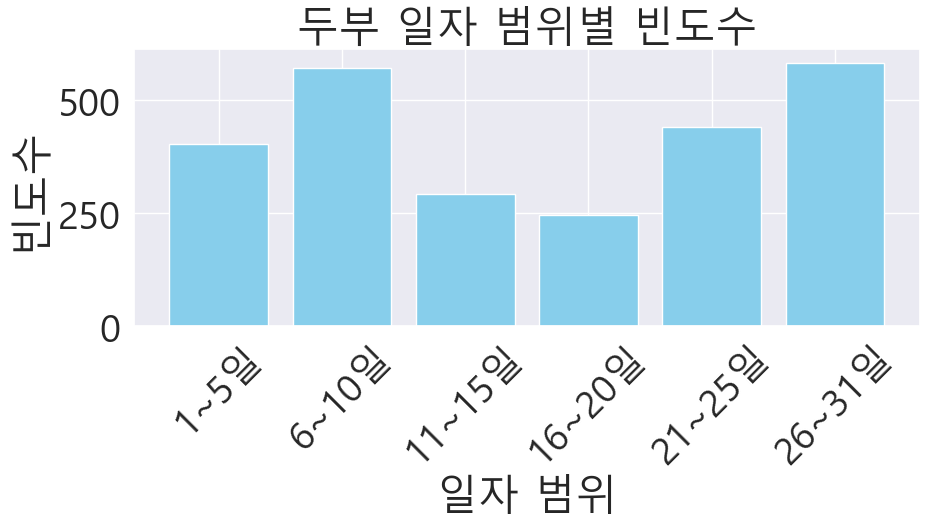

In [83]:
# 데이터프레임 생성
data = {
    '월': ['2022-01', '2022-01', '2022-01', '2022-02', '2022-02', '2022-02', 
          '2022-03', '2022-03', '2022-03', '2022-04', '2022-04', '2022-04', 
          '2022-05', '2022-05', '2022-05', '2022-06', '2022-06', '2022-06', 
          '2022-07', '2022-07', '2022-07', '2022-08', '2022-08', '2022-08', 
          '2022-09', '2022-09', '2022-09', '2022-10', '2022-10', '2022-10', 
          '2022-11', '2022-11', '2022-11'],
    '주문일시': [20, 27, 13, 10, 21, 17, 31, 24, 10, 28, 21, 7, 26, 12, 5, 23, 9, 30, 
             7, 21, 28, 4, 25, 18, 15, 1, 29, 13, 27, 6, 3, 2, 6],
    '빈도수': [83, 85, 87, 76, 86, 97, 60, 69, 72, 80, 84, 89, 66, 73, 84, 66, 69, 73, 
              66, 72, 74, 52, 64, 66, 72, 73, 73, 61, 73, 80, 82, 113, 119]
}

df = pd.DataFrame(data)

# 일자 범위 그룹화
def date_range_group(day):
    if 1 <= day <= 5:
        return '1~5일'
    elif 6 <= day <= 10:
        return '6~10일'
    elif 11 <= day <= 15:
        return '11~15일'
    elif 16 <= day <= 20:
        return '16~20일'
    elif 21 <= day <= 25:
        return '21~25일'
    elif 26 <= day <= 31:
        return '26~31일'
    else:
        return '미포함'

df['일자범위'] = df['주문일시'].apply(date_range_group)

# 범위별 빈도수 집계
range_counts = df.groupby('일자범위')['빈도수'].sum().reset_index()

# '일자범위'를 카테고리형으로 변환하고 순서 지정
categories = ['1~5일', '6~10일', '11~15일', '16~20일', '21~25일', '26~31일']
range_counts['일자범위'] = pd.Categorical(range_counts['일자범위'], categories=categories, ordered=True)

# 데이터 정렬
range_counts = range_counts.sort_values('일자범위')

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(range_counts['일자범위'], range_counts['빈도수'], color='skyblue')
plt.xlabel('일자 범위')
plt.ylabel('빈도수')
plt.title('두부 일자 범위별 빈도수')
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 출력
plt.show()

# 이번엔 두부 잘팔린 날 위와같은 방식

In [90]:
# '주문일시'를 datetime 형식으로 변환
df['주문일시'] = pd.to_datetime(df['주문일시'])

# 물품중분류가 '두부'인 데이터 필터링
df_filtered = df[df['물품중분류'] == '두부']

# 일자별 빈도수 집계
df_filtered['월'] = df_filtered['주문일시'].dt.to_period('M')
df_filtered['일자'] = df_filtered['주문일시'].dt.day
daily_counts = df_filtered.groupby(['월', '일자']).size().reset_index(name='빈도수')

# 월별로 빈도수 기준으로 가장 많은 3개 일자 찾기
result = daily_counts.groupby('월').apply(lambda x: x.nlargest(3, '빈도수')).reset_index(drop=True)

print(result)

          월  일자  빈도수
0   2022-01  21  214
1   2022-01  14  210
2   2022-01   8  200
3   2022-02  20  300
4   2022-02  19  256
5   2022-02   4  214
6   2022-03  25  203
7   2022-03  22  191
8   2022-03  11  190
9   2022-04  15  269
10  2022-04  22  232
11  2022-04  29  208
12  2022-05  20  215
13  2022-05  29  197
14  2022-05  10  193
15  2022-06  17  213
16  2022-06   3  197
17  2022-06  24  181
18  2022-07   1  223
19  2022-07  15  205
20  2022-07  29  180
21  2022-08  29  202
22  2022-08  19  196
23  2022-08  26  184
24  2022-09  28  288
25  2022-09  27  253
26  2022-09  16  226
27  2022-10  14  198
28  2022-10   7  193
29  2022-10  28  178
30  2022-11   4  179
31  2022-11   5  139
32  2022-11   1  133


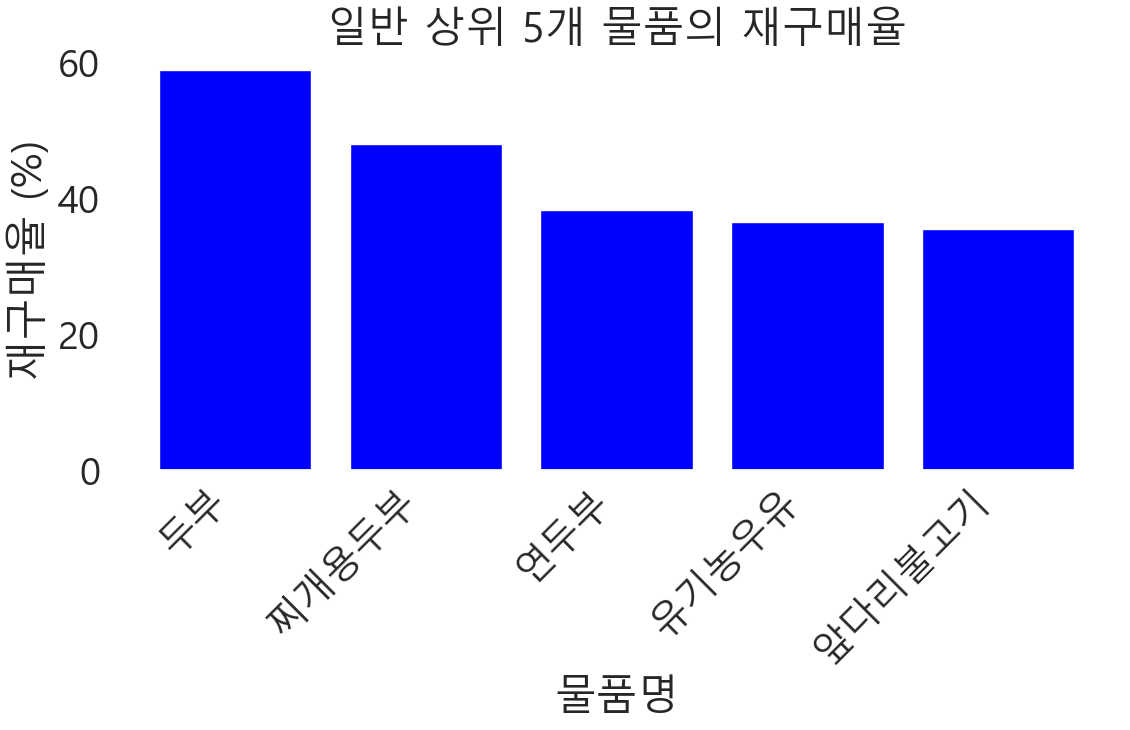

In [109]:
# 데이터 생성
data = {
    '물품명': ['두부', '찌개용두부', '연두부', '유기농우유', '앞다리불고기'],
    '재구매율': [58.757590, 47.958763, 38.251366, 36.534216, 35.401460, ]
}

df_top_items = pd.DataFrame(data)

# 소수점 첫 번째 자리까지 표시
df_top_items['재구매율'] = df_top_items['재구매율'].round(1)

# 그래프 그리기
plt.figure(figsize=(12, 8))
plt.bar(df_top_items['물품명'], df_top_items['재구매율'], color='blue')
plt.xlabel('물품명')
plt.ylabel('재구매율 (%)')
plt.title('일반 상위 5개 물품의 재구매율')
plt.xticks(rotation=45, ha='right')

# 격자선 없애기
plt.grid(False)

# 뒷 배경 흰색으로 설정
plt.gca().set_facecolor('white')


plt.tight_layout()

# 그래프 출력
plt.show()

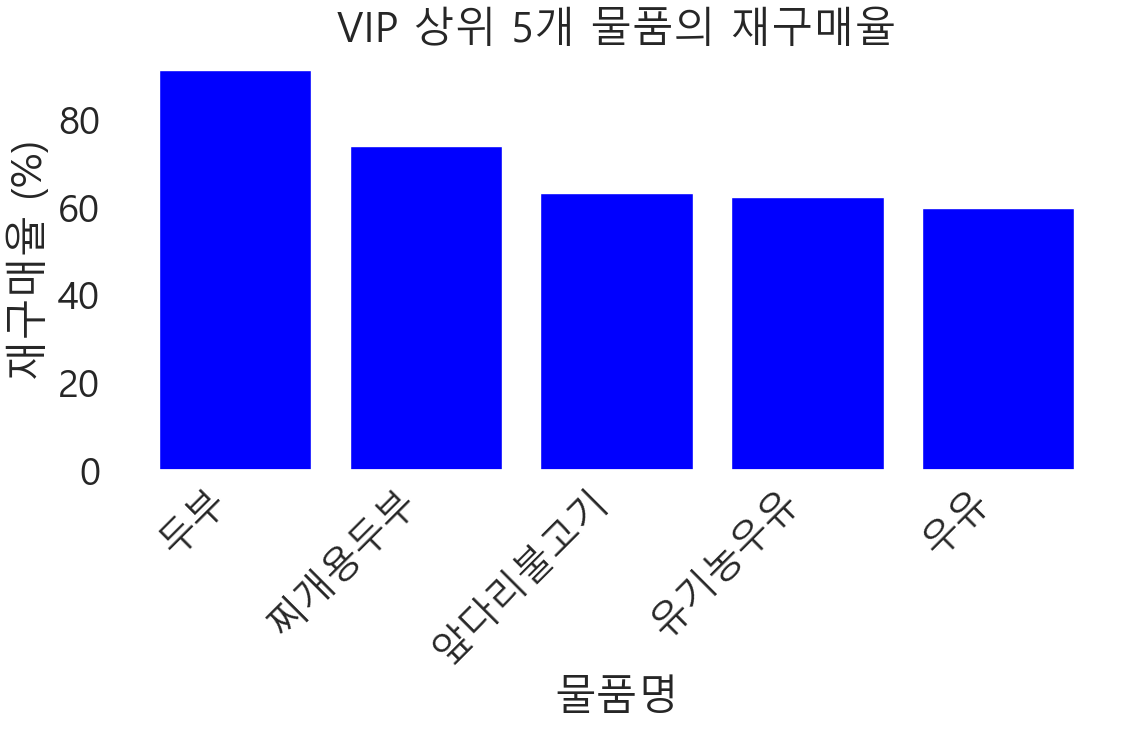

In [110]:
# 데이터 생성
data = {
    '물품명': ['두부', '찌개용두부', '앞다리불고기',  '유기농우유','우유' ],
    '재구매율': [91.297468, 73.965937, 63.307494, 62.345679, 59.942363 ]
}

df_top_items = pd.DataFrame(data)

# 소수점 첫 번째 자리까지 표시
df_top_items['재구매율'] = df_top_items['재구매율'].round(1)

# 그래프 그리기
plt.figure(figsize=(12, 8))
plt.bar(df_top_items['물품명'], df_top_items['재구매율'], color='blue')
plt.xlabel('물품명')
plt.ylabel('재구매율 (%)')
plt.title('VIP 상위 5개 물품의 재구매율')
plt.xticks(rotation=45, ha='right')

# 격자선 없애기
plt.grid(False)

# 뒷 배경 흰색으로 설정
plt.gca().set_facecolor('white')


plt.tight_layout()

# 그래프 출력
plt.show()

In [ ]:
물품명	재구매고객수	전체고객수	재구매율
102	두부	1154	1264	91.297468
347	찌개용두부	608	822	73.965937
263	앞다리불고기-성남용인	245	387	63.307494
312	유기농우유	303	486	62.345679
300	우유	208	347	59.942363

In [ ]:
# 식품, 일반, 비냉장

## 식품, 신선, 일반

In [99]:
# 1. 주문완료만 필터링
df_filtered = df[(df['주문취소여부'] == '주문완료') & (df['식품/비식품'] == '식품') & (df['고객분류'] == '일반') & (df['신선여부'] == '신선')]

# 2. 중복된 주문일시 제거
df_filtered = df_filtered.drop_duplicates(subset=['회원번호', '주문일시', '물품명'])

# 3. 물품별 고객 수가 하나인 물품 제거
customer_counts = df_filtered.groupby('물품명')['회원번호'].nunique().reset_index(name='고객수')
valid_items = customer_counts[customer_counts['고객수'] > 1]['물품명']
df_filtered = df_filtered[df_filtered['물품명'].isin(valid_items)]

# 4. 물품별 회원의 주문 횟수 계산
order_counts = df_filtered.groupby(['물품명', '회원번호']).size().reset_index(name='주문수')

# 5. 물품별 재구매 고객 수와 전체 구매 고객 수 계산
rebuy_counts = order_counts.groupby('물품명').apply(lambda x: (x['주문수'] > 1).sum()).reset_index(name='재구매고객수')
total_counts = order_counts.groupby('물품명')['회원번호'].nunique().reset_index(name='전체고객수')

# 6. 재구매율 계산
rebuy_rate = pd.merge(rebuy_counts, total_counts, on='물품명')
rebuy_rate['재구매율'] = (rebuy_rate['재구매고객수'] / rebuy_rate['전체고객수']) * 100

# 7. 재구매 고객수가 최소 100명 이상인 제품만 필터링
rebuy_rate_filtered = rebuy_rate[rebuy_rate['재구매고객수'] >= 100]

# 8. 재구매율이 높은 순으로 정렬
rebuy_rate_sorted = rebuy_rate_filtered.sort_values(by='재구매율', ascending=False)

rebuy_rate_sorted.head(10)

,물품명,재구매고객수,전체고객수,재구매율
689,유정란/친환경,2351,3999,58.789697
838,콩나물,1579,3196,49.405507
600,양파,969,2288,42.351399
401,백미/유,494,1196,41.304348
220,동물복지유정란,926,2266,40.864960
195,당근,813,2061,39.446870
628,오이,697,1781,39.135317
41,검은콩두유,258,672,38.392857
77,구운도시락김,259,682,37.976540
742,중파,530,1471,36.029912


## 식품, 신선, VIP

In [100]:
# 1. 주문완료만 필터링
df_filtered = df[(df['주문취소여부'] == '주문완료') & (df['식품/비식품'] == '식품') & (df['고객분류'] == 'VIP') & (df['신선여부'] == '신선')]

# 2. 중복된 주문일시 제거
df_filtered = df_filtered.drop_duplicates(subset=['회원번호', '주문일시', '물품명'])

# 3. 물품별 고객 수가 하나인 물품 제거
customer_counts = df_filtered.groupby('물품명')['회원번호'].nunique().reset_index(name='고객수')
valid_items = customer_counts[customer_counts['고객수'] > 1]['물품명']
df_filtered = df_filtered[df_filtered['물품명'].isin(valid_items)]

# 4. 물품별 회원의 주문 횟수 계산
order_counts = df_filtered.groupby(['물품명', '회원번호']).size().reset_index(name='주문수')

# 5. 물품별 재구매 고객 수와 전체 구매 고객 수 계산
rebuy_counts = order_counts.groupby('물품명').apply(lambda x: (x['주문수'] > 1).sum()).reset_index(name='재구매고객수')
total_counts = order_counts.groupby('물품명')['회원번호'].nunique().reset_index(name='전체고객수')

# 6. 재구매율 계산
rebuy_rate = pd.merge(rebuy_counts, total_counts, on='물품명')
rebuy_rate['재구매율'] = (rebuy_rate['재구매고객수'] / rebuy_rate['전체고객수']) * 100

# 7. 재구매 고객수가 최소 100명 이상인 제품만 필터링
rebuy_rate_filtered = rebuy_rate[rebuy_rate['재구매고객수'] >= 100]

# 8. 재구매율이 높은 순으로 정렬
rebuy_rate_sorted = rebuy_rate_filtered.sort_values(by='재구매율', ascending=False)

rebuy_rate_sorted.head(10)

,물품명,재구매고객수,전체고객수,재구매율
102,두부,1154,1264,91.297468
347,찌개용두부,608,822,73.965937
263,앞다리불고기-성남용인,245,387,63.307494
312,유기농우유,303,486,62.345679
300,우유,208,347,59.942363
313,유기농저지방우유,186,313,59.424920
309,유기농성이시돌목장우유,174,293,59.385666
282,연두부,208,384,54.166667
71,닭가슴살,199,375,53.066667
338,저지방우유,106,208,50.961538


## 하위 10개 제품
- 그 중에서 일반적으로 구매 주기가 긴 것들은 제외하고(ppt)

In [ ]:
# 1. 주문완료만 필터링
df_filtered = df[(df['주문취소여부'] == '주문완료')

# 2. 중복된 주문일시 제거
df_filtered = df_filtered.drop_duplicates(subset=['회원번호', '주문일시', '물품명'])

# 3. 물품별 고객 수가 하나인 물품 제거
customer_counts = df_filtered.groupby('물품명')['회원번호'].nunique().reset_index(name='고객수')
valid_items = customer_counts[customer_counts['고객수'] > 1]['물품명']
df_filtered = df_filtered[df_filtered['물품명'].isin(valid_items)]

# 4. 물품별 회원의 주문 횟수 계산
order_counts = df_filtered.groupby(['물품명', '회원번호']).size().reset_index(name='주문수')

# 5. 물품별 재구매 고객 수와 전체 구매 고객 수 계산
rebuy_counts = order_counts.groupby('물품명').apply(lambda x: (x['주문수'] > 1).sum()).reset_index(name='재구매고객수')
total_counts = order_counts.groupby('물품명')['회원번호'].nunique().reset_index(name='전체고객수')

# 6. 재구매율 계산
rebuy_rate = pd.merge(rebuy_counts, total_counts, on='물품명')
rebuy_rate['재구매율'] = (rebuy_rate['재구매고객수'] / rebuy_rate['전체고객수']) * 100

# 7. 재구매 고객수가 최소 100명 이상인 제품만 필터링
rebuy_rate_filtered = rebuy_rate[rebuy_rate['재구매고객수'] >= 100]

# 8. 재구매율이 낮은 순으로 정렬
rebuy_rate_sorted = rebuy_rate_filtered.sort_values(by='재구매율', ascending=True)

rebuy_rate_sorted.head(10)

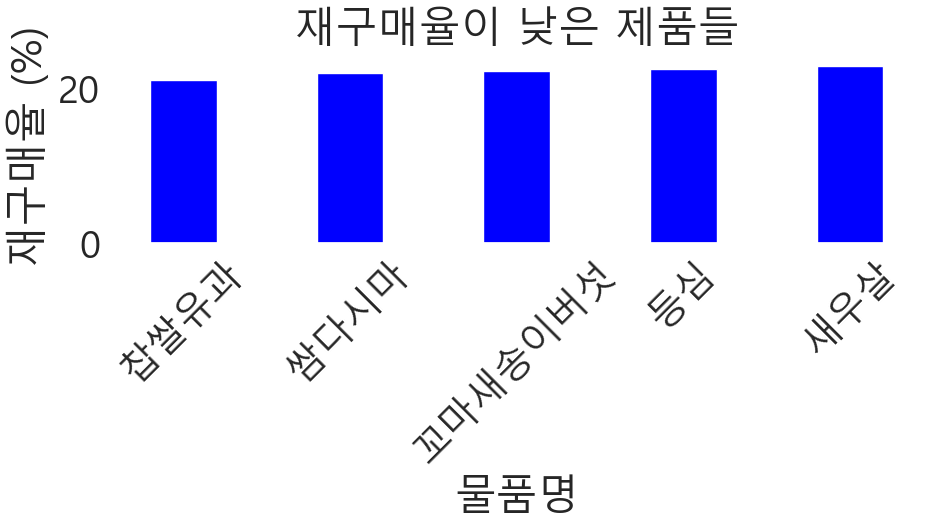

In [116]:
# 데이터 생성
data = {
    '물품명': ['찹쌀유과', '쌈다시마', '꼬마새송이버섯', '등심', '새우살'],
    '재구매율': [21.097046, 22.000000, 22.370937, 22.538293, 23.003802]
}

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
bar_width = 0.4  # 막대 너비 설정
plt.bar(data['물품명'], data['재구매율'], color='blue', width=bar_width)

# 그래프 요소 설정
plt.xlabel('물품명')
plt.ylabel('재구매율 (%)')
plt.title('재구매율이 낮은 제품들')
plt.ylim(0, 25)  # y축 범위 설정
plt.xticks(rotation=45)

# 격자선 없애고 뒷 배경 흰색으로 설정
plt.grid(False)
plt.gca().set_facecolor('white')

# 그래프 출력
plt.tight_layout()
plt.show()